In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [27]:
# train and test data
train_data=pd.read_csv(r'C:\Users\User\Desktop\ms\projects\Janatahack Machine Learning in Agriculture\train_yaOffsB.csv')
test_data=pd.read_csv(r'C:\Users\User\Desktop\ms\projects\Janatahack Machine Learning in Agriculture\test_pFkWwen.csv')

In [3]:
train_data.shape

(88858, 10)

In [4]:
train_data.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

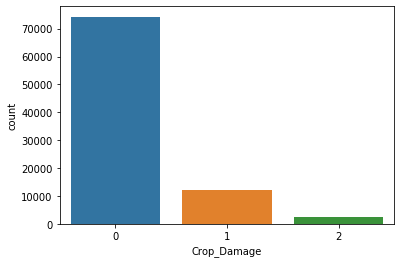

In [5]:
#distribution of traget variable
sns.countplot(train_data['Crop_Damage'])
train_data['Crop_Damage'].value_counts()

according to data distribution it is a imbalanced case of classification

  category       data percente
   1.             86.92
   2.             13.85
   3.             .026

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [6]:
train_data['Number_Weeks_Used']=train_data['Number_Weeks_Used'].fillna(999)
test_data['Number_Weeks_Used']=test_data['Number_Weeks_Used'].fillna(999)

In [ ]:
train_data=train_data['Number_Weeks_Used']

In [29]:
train_data['Crop_Type']=train_data['Crop_Type'].astype('object')
train_data['Soil_Type']=train_data['Soil_Type'].astype('object')
train_data['Pesticide_Use_Category']=train_data['Pesticide_Use_Category'].astype('object')
train_data['Season']=train_data['Season'].astype('object')

test_data['Crop_Type']=test_data['Crop_Type'].astype('object')
test_data['Soil_Type']=test_data['Soil_Type'].astype('object')
test_data['Pesticide_Use_Category']=test_data['Pesticide_Use_Category'].astype('object')
test_data['Season']=test_data['Season'].astype('object')

In [30]:
obj=train_data[['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']]
encod=pd.get_dummies(obj,drop_first=True)

obj1=test_data[['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']]
encod1=pd.get_dummies(obj1,drop_first=True)

In [31]:
train_data1=pd.concat([train_data,encod],axis=1)
test_data1=pd.concat([test_data,encod1],axis=1)

In [32]:
train_data2=train_data1.drop(columns=['Crop_Type','Soil_Type','Pesticide_Use_Category','Season'])
test_data2=test_data1.drop(columns=['Crop_Type','Soil_Type','Pesticide_Use_Category','Season'])

In [33]:
train_data3=train_data2.drop(columns=['ID'])

ID=test_data2['ID']

test_data3=test_data2.drop(columns=['ID'])

In [34]:
y=train_data3.loc[:,'Crop_Damage']
x=train_data3.drop(columns=['Crop_Damage'])

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(estimator=xgb_model, 
           k_features=(3,8),
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=5)
sfs1.fit(x,y)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=XGBClassifier(base_score=0.5, booster=None,
                                                  colsample_bylevel=1,
                                                  colsample_bynode=1,
                                                  colsample_bytree=1, gamma=0,
                                                  gpu_id=-1,
                                                  importance_type='gain',
                                                  interaction_constraints=None,
                                                  learning_rate=0.1,
                                                  max_delta_step=0, max_depth=6,
                                                  min_child_weight=1,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  n_estimator=100,
    

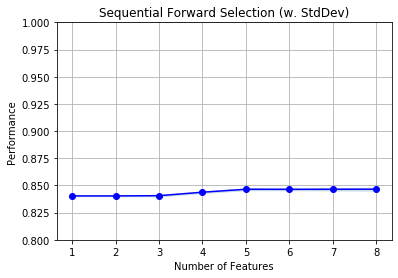

In [40]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit(x)
x1=st.transform(x)
test=st.transform(test_data3)

In [36]:
#split data into train test by sample size .2
X_train, X_test, y_train, y_test = train_test_split(x1,y, test_size=0.2)

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =1000,max_depth=15, min_samples_split=5)
classifier.fit(X_train,y_train)
pred1=classifier.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))

[[14631   256     6]
 [ 2041   391    15]
 [  302   126     4]]
0.8454872833670943


In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=9, min_samples_split=5)
clf.fit(X_train,y_train)
pred1=clf.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))

[[14648   221     4]
 [ 2117   306     5]
 [  361   101     9]]
0.8419423812739141


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=0,n_estimators=100)
gbc.fit(X_train,y_train)
pred1=gbc.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))

[[14717   176     0]
 [ 2104   343     0]
 [  319   113     0]]
0.8474004051316678


In [38]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimator=100,learning_rate=0.1)
xgb_model.fit(x1,y)
pred1=xgb_model.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))

[[14674   199     0]
 [ 1970   458     0]
 [  334   136     1]]
0.8515079900967815


In [19]:
from lightgbm import LGBMClassifier
lgb= LGBMClassifier(n_estimators=100,learning_rate=0.1)
lgb.fit(x1,y)
pred1=lgb.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))

[[14673   220     0]
 [ 1974   473     0]
 [  291   141     0]]
0.8522394778302949


In [40]:
from sklearn.ensemble import VotingClassifier
estim=[('lgb',lgb),('xgb',xgb_model),('gbc',gbc)]
vt=VotingClassifier(estimators=estim,voting="soft")
vt.fit(x1,y)
pred1=vt.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))

[[14696   177     0]
 [ 2012   416     0]
 [  346   125     0]]
0.8503263560657214


In [25]:
from sklearn.neural_network import MLPClassifier
mp_clf=MLPClassifier(hidden_layer_sizes=(32,16,8))
mp_clf.fit(x1,y)
pred1=mp_clf.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))

[[14709   184     0]
 [ 2115   331     1]
 [  330   100     2]]
0.8463875759621877


In [41]:
#submission file by lgb classifer
pred=vt.predict(test)
pred_sub=pd.DataFrame(pred,columns=['Crop_Damage'])
final_data=pd.DataFrame(pd.concat([ID,pred_sub],axis=1))
final_data.to_csv(r'C:\Users\User\Desktop\ms\projects\Janatahack Machine Learning in Agriculture\final_sub.csv',index=False)